In [1]:
from datetime import datetime
import pickle

import numpy as np
import pandas as pd
import tqdm

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(style="white")

In [2]:
tr_data = pd.read_csv('data/merged_221220_221231_with_contracts.csv')
tr_data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,is_contract_transaction,baseFeePerGas,wait_time_adjusted,is_ofac,priority_fee,maxFeePerGas,maxPriorityFeePerGas,gasUsed,effectiveGasPrice,nonce
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,True,17.248596,0.0,False,99.865409,117.114005,117.114005,189564,117.114005,12269
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,True,17.248596,0.0,False,6.684293,23.932889,23.932889,214272,23.932889,907
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,True,17.248596,0.0,False,0.000000,17.248596,17.248596,152585,17.248596,1689
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,...,True,17.248596,3.0,False,0.963838,0.000000,0.000000,208202,18.212433,19
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,True,17.248596,0.0,False,3.550201,20.798797,20.798797,122513,20.798797,1690


In [4]:
tr_data.shape

(11527306, 28)

In [5]:
with open('data/twelve_days_blocks.pickle', 'rb') as f:
    blocks_info = pickle.load(f)
len(blocks_info)

86002

In [6]:
blocks_info[16221291]

AttributeDict({'baseFeePerGas': 17248595741,
 'difficulty': 0,
 'extraData': HexBytes('0x627920406275696c64657230783639'),
 'gasLimit': 30000000,
 'gasUsed': 22334900,
 'hash': HexBytes('0x47113ab19d73a5c56854ae24273a1caf43b477a175964557464f92078f8317d0'),
 'logsBloom': HexBytes('0x0fac8947ded099117b9f11738b15373339dcee3184c1f7c8473f2dffd477c7fe7e85bb4fdf685c87cdea1bad99cded3f4e718ede7b4cf926cf8e856b36fb6d5d684c02fded70ffbaffcf3f9fdb51f9f5bff4d8f6c566569586aafc11ba063d52bb4f31cf2e0f64caa6c8f49118afe9f94b4fbc037ebc24d1ce619af3d79f7e752514bbfd8f6b1c5517ef8cfa033ec8bd6f87dd05b77a8faf4fe0914f63f3d19c8b9853485a377771ae82ddf8e782af8abf1f2e16a2ffabbb907feff7d4bc60dc633fd5d671918ddd95fc6fc77d0355862fd9db77feda8e7e09165fffbe4ce84ea932390e1d96def89edc39b555a44996e830115fc6cfa65d107dbe99d2017d4b'),
 'miner': '0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990',
 'mixHash': HexBytes('0xb807b663a409a370b45d6eee1fba7e646a0110f06011c44491a298684a201aa4'),
 'nonce': HexBytes('0x0000000000000000'),
 'number': 

In [7]:
with open('data/addresses_from_receipts.pickle', 'rb') as f:
    addresses_from_receipts = pickle.load(f)
len(addresses_from_receipts)

8357981

In [8]:
def get_baseFeePerGas(x):
    # _, row = x
    block_info = blocks_info[x['blockNumber']]
    return block_info['baseFeePerGas']

In [ ]:
baseFeePerGas = tr_data.apply(get_baseFeePerGas, axis=1)

In [ ]:
tr_data['baseFeePerGas'] = baseFeePerGas / 10**9
tr_data.head()

In [ ]:
# Сколько у нас транзакций имеют отрицательное время ожидания

n_negative_waiting = len(tr_data[tr_data['waiting'] < 0])
print(f'Транзакции с отрицательным временем ожидания: {n_negative_waiting} ({n_negative_waiting / len(tr_data) * 100:0.2f}%)')

In [ ]:
tr_data['wait_time_adjusted'] = tr_data['waiting']
tr_data.loc[tr_data['wait_time_adjusted'] < 0, 'wait_time_adjusted'] = 0
tr_data.loc[tr_data['wait_time_adjusted'].isna(), 'wait_time_adjusted'] = 0

# Get OFAC list

In [ ]:
import urllib.request as req
from urllib.error import URLError
import re
import time

def get_banned_wallets(ofac_list_url: str):
    '''
    Get list of cryptowallets banned by OFAC
    Args:
        ofac_list_url:  URL of complete OFAC SDN list
        logger:         Logger
    Returns:
        List of cryptowallets addresses
    '''
    def truncate_address(address: str):
        '''
        Truncate cryptowallets addresses
        Args:
            address: Cryptowallet address in format Digital Currency Address - ...;
        Returns:
            Cryptowallet address in format {prefix : address}
        '''
        splitted = address.split(' ')
        prefix = splitted[-2]
        address_ = splitted[-1][:-1]
        return {prefix: address_}

    is_successful = True

    try:
        # Read txt file from OFAC website
        res = req.urlopen(ofac_list_url)
        banlist = str(res.read().decode('utf-8'))
        banlist = banlist.replace('\n', ' ')

        # Regexp to find cryptowallets addresses
        pattern = re.compile('Digital Currency Address - .{20,60};')

        # Find all cryptowallets addresses in document and truncate them
        banned_wallets = re.findall(pattern, banlist)
        banned_wallets = list(map(truncate_address, banned_wallets))
    except URLError as e:
        print(e)
        is_successful = False

    return banned_wallets, is_successful


def get_grouped_by_prefixes(banned_wallets):
    '''
    Group all wallets by address prefix
    Args:
        banned_wallets: List of cryptowallets addresses in format {prefix:address}
    Returns:
        Dict in format {wallets: {prefix : list of addresses}, dt: time}
    '''
    wallets = pd.DataFrame([[(k, v) for k, v in el.items()][0] for el in banned_wallets], columns=['Prefix', 'Wallet'])
    grouped_wallets = wallets.groupby('Prefix')['Wallet'].apply(list)
    grouped_wallets = grouped_wallets.to_dict()

    entity = {}
    entity['wallets'] = grouped_wallets
    entity['dt'] = int(time.time())

    return entity

In [ ]:
banned_wallets, is_successful = get_banned_wallets('https://www.treasury.gov/ofac/downloads/sdnlist.txt')

In [ ]:
len(banned_wallets)

In [ ]:
grouped_wallets = get_grouped_by_prefixes(banned_wallets)['wallets']

In [ ]:
grouped_wallets

In [427]:
with open('ofac_wallets.pickle', 'wb') as f:
    pickle.dump(grouped_wallets, f)

In [ ]:
with open('ofac_wallets.pickle', 'rb') as f:
    grouped_wallets = pickle.load(f)

In [17]:
eth_ofac_wallets = set(grouped_wallets['ETH'] + grouped_wallets['USDT'])
print(len(eth_ofac_wallets))
eth_ofac_wallets = set([el for el in eth_ofac_wallets if el[:2] == '0x'])
print(f'ETH and USDT in ETH addresses: {len(eth_ofac_wallets)}')

139
ETH and USDT in ETH addresses: 132


In [18]:
def is_transaction_in_ofac_list(x):
    tx_addresses = [x['from'], x['to']]
    if x['is_contract_transaction']:
        additional_addresses = addresses_from_receipts[x['tx_hash']]
        tx_addresses = tx_addresses + additional_addresses
    return len(eth_ofac_wallets.intersection(set(tx_addresses))) > 0

In [19]:
tr_data['is_ofac'] = tr_data.apply(is_transaction_in_ofac_list, axis=1)

## Сколько процент транзакций, которые не были в mem pool

In [12]:
ofac_n_is_nan = tr_data[tr_data['is_ofac']]['waiting'].isna().sum()
not_ofac_n_is_nan = tr_data[~tr_data['is_ofac']]['waiting'].isna().sum()
print(f'Number of OFAC transactions not from mempool {ofac_n_is_nan} ({ofac_n_is_nan / len(tr_data[tr_data["is_ofac"]]) * 100:0.2f}%)')
print(f'Number of non OFAC transactions not from mempool {not_ofac_n_is_nan} ({not_ofac_n_is_nan / len(tr_data[~tr_data["is_ofac"]]) * 100:0.2f}%)')

Number of OFAC transactions not from mempool 207 (9.17%)
Number of non OFAC transactions not from mempool 369610 (3.21%)


## Посмотрим на среднее время ожидания транзакций

# <font color='green'>OFAC транзакции в среднем ждут дольше</font>

In [21]:
tr_data[tr_data['is_ofac']]['waiting'].describe()

count     2051.000000
mean        40.631887
std        565.526079
min         -3.000000
25%          7.000000
50%         14.000000
75%         29.000000
max      22232.000000
Name: waiting, dtype: float64

In [22]:
thrs = 20000
len(tr_data[(~tr_data['is_ofac']) & (tr_data['waiting'] >= thrs)]) / len(tr_data[~tr_data['is_ofac']])

0.010112148773697082

In [23]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
print(tr_data[(~tr_data['is_ofac']) & (tr_data['waiting'] < thrs)]['waiting'].describe())
pd.reset_option('display.float_format')

count   11038895.000000
mean          32.570208
std          406.255876
min          -14.000000
25%            4.000000
50%            7.000000
75%           10.000000
max        19988.000000
Name: waiting, dtype: float64


## Посмотрим на сколько цена на газ превышала базовую

In [24]:
tr_data['priority_fee'] = tr_data['gasPrice'] - tr_data['baseFeePerGas']
tr_data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,validator_address,pub_key_lido_status,validator_type,eth_datetime,eth_hour,is_contract_transaction,baseFeePerGas,wait_time_adjusted,is_ofac,priority_fee
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,0.0,False,99.865409
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,0.0,False,6.684293
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,0.0,False,0.000000
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,3.0,False,0.963838
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,NaN,NaN,Non Lido,2022-12-19 21:00:11,2022-12-19 21:00:00,True,17.248596,0.0,False,3.550201


# <font color='green'>За OFAC транзакции обычно платят больше</font>

In [25]:
tr_data[tr_data['is_ofac']]['priority_fee'].describe()

count    2258.000000
mean        5.196997
std        36.661820
min         0.000000
25%         1.500000
50%         2.000000
75%         3.000000
max      1086.523259
Name: priority_fee, dtype: float64

In [26]:
tr_data[~tr_data['is_ofac']]['priority_fee'].describe()

count    1.152505e+07
mean     3.589903e+00
std      1.661362e+02
min      0.000000e+00
25%      1.313934e+00
50%      1.500000e+00
75%      2.000000e+00
max      5.046959e+05
Name: priority_fee, dtype: float64

## Сравним зависимость waiting_time от priority_fee для ofac и non_ofac

In [5]:
ofac_transactions = tr_data[tr_data['is_ofac']]
non_ofac_sample_transactions = tr_data[~tr_data['is_ofac']].sample(10000)

In [6]:
ofac_99_wait_time = np.percentile(ofac_transactions['wait_time_adjusted'], 99)
print(f"99 percentile for OFAC data: {ofac_99_wait_time}")
ofac_transactions['wait_time_adjusted'].describe()

99 percentile for OFAC data: 118.85999999999967


count     2258.000000
mean        36.910983
std        539.096298
min          0.000000
25%          5.000000
50%         12.000000
75%         26.000000
max      22232.000000
Name: wait_time_adjusted, dtype: float64

In [7]:
ofac_99_priority_fee = np.percentile(ofac_transactions['priority_fee'], 99)
print(f"99 percentile for OFAC data: {ofac_99_priority_fee}")
ofac_transactions['priority_fee'].describe()

99 percentile for OFAC data: 40.770011733629985


count    2258.000000
mean        5.196997
std        36.661820
min         0.000000
25%         1.500000
50%         2.000000
75%         3.000000
max      1086.523259
Name: priority_fee, dtype: float64

In [8]:
non_ofac_97_wait_time = np.percentile(non_ofac_sample_transactions['wait_time_adjusted'], 97)
print(f"97 percentile for OFAC data: {non_ofac_97_wait_time}")
non_ofac_sample_transactions['wait_time_adjusted'].describe()

97 percentile for OFAC data: 91.0


count     10000.000000
mean       6207.732700
std       60340.660867
min           0.000000
25%           3.000000
50%           7.000000
75%          10.000000
max      682245.000000
Name: wait_time_adjusted, dtype: float64

In [9]:
non_ofac_99_priority_fee = np.percentile(non_ofac_sample_transactions['priority_fee'], 99)
print(f"99 percentile for OFAC data: {non_ofac_99_priority_fee}")
non_ofac_sample_transactions['priority_fee'].describe()

99 percentile for OFAC data: 34.20312228242001


count    10000.000000
mean         3.637164
std         32.467418
min          0.000000
25%          1.271428
50%          1.500000
75%          2.000000
max       2439.121905
Name: priority_fee, dtype: float64

In [10]:
ofac_transactions_no_outliers = ofac_transactions[(ofac_transactions['wait_time_adjusted'] < ofac_99_wait_time)
                                                   & (ofac_transactions['priority_fee'] < ofac_99_priority_fee)]
print(f'Filtered OFAC transactions: {len(ofac_transactions_no_outliers)}')

non_ofac_transactions_no_outliers = non_ofac_sample_transactions[(non_ofac_sample_transactions['wait_time_adjusted'] < non_ofac_97_wait_time)
                                                                 & (non_ofac_sample_transactions['priority_fee'] < non_ofac_99_priority_fee)]
print(f'Filtered NON OFAC transactions: {len(non_ofac_transactions_no_outliers)}')

Filtered OFAC transactions: 2212
Filtered NON OFAC transactions: 9599


## <font color='green'>Популяция - транзакции без выбросов<p><p>OFAC - 99 персентиль по времени ожидания и priority fee<p>NON OFAC - 97 персентиль по времени ожидания и 99 персентиль по priority fee</font>

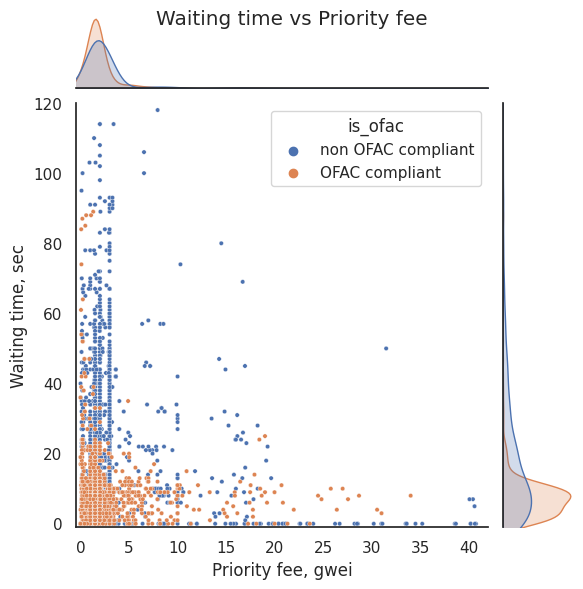

OFAC mean waiting time: 18.7875, median: 12.0
NON OFAC mean waiting time: 7.6685, median: 7.0


In [12]:
sample_size = 2000
ofac_sample = ofac_transactions_no_outliers.sample(sample_size)
non_ofac_sample = non_ofac_transactions_no_outliers.sample(sample_size)

merged_sample = pd.concat([ofac_sample, non_ofac_sample]).copy()
merged_sample.loc[merged_sample['is_ofac'], 'is_ofac'] = 'non OFAC compliant'
merged_sample.loc[merged_sample['is_ofac'] != 'non OFAC compliant', 'is_ofac'] = 'OFAC compliant'
p = sns.jointplot(data=merged_sample, x="priority_fee", y="wait_time_adjusted", hue="is_ofac", s=10, ylim=(-1, 120), xlim=(-0.5, 42))
p.fig.suptitle("Waiting time vs Priority fee")
plt.xlabel('Priority fee, gwei')
plt.ylabel('Waiting time, sec')
plt.show()
print(f"OFAC mean waiting time: {ofac_sample['wait_time_adjusted'].mean()}, median: {ofac_sample['wait_time_adjusted'].median()}")
print(f"NON OFAC mean waiting time: {non_ofac_sample['wait_time_adjusted'].mean()}, median: {non_ofac_sample['wait_time_adjusted'].median()}")

In [13]:
ofac_transactions_no_outliers_subsample = ofac_transactions[(ofac_transactions['wait_time_adjusted'] < 60)
                                                            & (ofac_transactions['priority_fee'] < 20)]
print(f'Filtered OFAC transactions: {len(ofac_transactions_no_outliers_subsample)}')

non_ofac_transactions_no_outliers_subsample = non_ofac_sample_transactions[(non_ofac_sample_transactions['wait_time_adjusted'] < 60)
                                                                           & (non_ofac_sample_transactions['priority_fee'] < 20)]
print(f'Filtered NON OFAC transactions: {len(non_ofac_transactions_no_outliers_subsample)}')

Filtered OFAC transactions: 2070
Filtered NON OFAC transactions: 9447


## <font color='green'>Оставим только транзакции с временем ожидания < 60 и priority fee < 20</font>

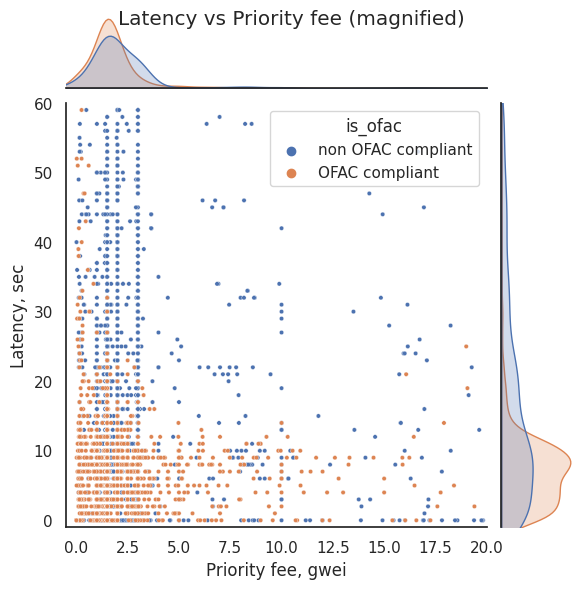

OFAC mean waiting time: 16.096, median: 11.0
NON OFAC mean waiting time: 7.2355, median: 7.0


In [40]:
sample_size = 2000
ofac_subsample = ofac_transactions_no_outliers_subsample.sample(sample_size)
non_ofac_subsample = non_ofac_transactions_no_outliers_subsample.sample(sample_size)

merged_subsample = pd.concat([ofac_subsample, non_ofac_subsample]).copy()
merged_subsample.loc[merged_subsample['is_ofac'], 'is_ofac'] = 'non OFAC compliant'
merged_subsample.loc[merged_subsample['is_ofac'] != 'non OFAC compliant', 'is_ofac'] = 'OFAC compliant'
p = sns.jointplot(data=merged_subsample, x="priority_fee", y="wait_time_adjusted", hue="is_ofac", s=10, ylim=(-1, 60), xlim=(-0.5, 20))
p.fig.suptitle("Latency vs Priority fee (magnified)")
plt.xlabel('Priority fee, gwei')
plt.ylabel('Latency, sec')
plt.show()
print(f"OFAC mean waiting time: {ofac_subsample['wait_time_adjusted'].mean()}, median: {ofac_subsample['wait_time_adjusted'].median()}")
print(f"NON OFAC mean waiting time: {non_ofac_subsample['wait_time_adjusted'].mean()}, median: {non_ofac_subsample['wait_time_adjusted'].median()}")

## Посмотрим аналитику по LIDO/NON LIDO

In [16]:
all_non_ofac = tr_data[~tr_data['is_ofac']]
all_ofac = tr_data[tr_data['is_ofac']]

print('All transactions distribution:')
print(tr_data['validator_type'].value_counts() / len(tr_data))
print('\nNon OFAC transactions distribution:')
print(all_non_ofac['validator_type'].value_counts() / len(all_non_ofac))
print('\nOFAC transactions distribution:')
print(all_ofac['validator_type'].value_counts() / len(all_ofac))

All transactions distribution:
Non Lido    0.694542
Lido        0.305458
Name: validator_type, dtype: float64

Non OFAC transactions distribution:
Non Lido    0.694537
Lido        0.305463
Name: validator_type, dtype: float64

OFAC transactions distribution:
Non Lido    0.717892
Lido        0.282108
Name: validator_type, dtype: float64


In [17]:
lido_non_ofac_sample = all_non_ofac[all_non_ofac['validator_type'] == 'Lido'].sample(10000)
lido_ofac_sample = all_ofac[all_ofac['validator_type'] == 'Lido']

print(f'OFAC: {len(lido_ofac_sample)}, NON OFAC: {len(lido_non_ofac_sample)}')

OFAC: 637, NON OFAC: 10000


In [18]:
lido_ofac_transactions_no_outliers = lido_ofac_sample[(lido_ofac_sample['wait_time_adjusted'] < ofac_99_wait_time)
                                                      & (lido_ofac_sample['priority_fee'] < ofac_99_priority_fee)]
print(f'Filtered Lido OFAC transactions: {len(lido_ofac_transactions_no_outliers)}')

lido_non_ofac_transactions_no_outliers = lido_non_ofac_sample[(lido_non_ofac_sample['wait_time_adjusted'] < non_ofac_97_wait_time)
                                                              & (lido_non_ofac_sample['priority_fee'] < non_ofac_99_priority_fee)]
print(f'Filtered Lido NON OFAC transactions: {len(lido_non_ofac_transactions_no_outliers)}')

Filtered Lido OFAC transactions: 627
Filtered Lido NON OFAC transactions: 9577


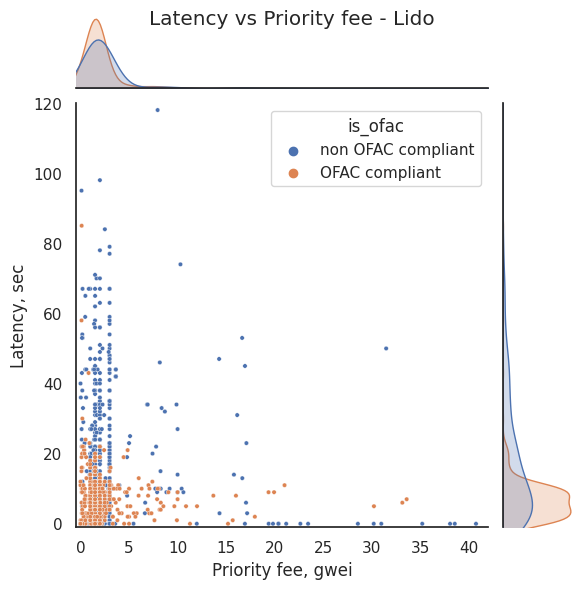

Lido OFAC mean waiting time: 18.115, median: 11.0
Lido NON OFAC mean waiting time: 6.808333333333334, median: 6.0


In [42]:
sample_size = 600
ofac_lido_sample = lido_ofac_transactions_no_outliers.sample(sample_size)
non_ofac_lido_sample = lido_non_ofac_transactions_no_outliers.sample(sample_size)

merged_lido_sample = pd.concat([ofac_lido_sample, non_ofac_lido_sample]).copy()
merged_lido_sample.loc[merged_lido_sample['is_ofac'], 'is_ofac'] = 'non OFAC compliant'
merged_lido_sample.loc[merged_lido_sample['is_ofac'] != 'non OFAC compliant', 'is_ofac'] = 'OFAC compliant'
p = sns.jointplot(data=merged_lido_sample, x="priority_fee", y="wait_time_adjusted", hue="is_ofac", s=10, ylim=(-1, 120), xlim=(-0.5, 42))
p.fig.suptitle("Latency vs Priority fee - Lido")
plt.xlabel('Priority fee, gwei')
plt.ylabel('Latency, sec')
plt.show()
print(f"Lido OFAC mean waiting time: {ofac_lido_sample['wait_time_adjusted'].mean()}, median: {ofac_lido_sample['wait_time_adjusted'].median()}")
print(f"Lido NON OFAC mean waiting time: {non_ofac_lido_sample['wait_time_adjusted'].mean()}, median: {non_ofac_lido_sample['wait_time_adjusted'].median()}")

# <font color='red'>Можно аналогично посчитать по каждому валидатору Lido (но там будет совсем мало транзакций - так что данные нужны за больший период)</font>

# Посмотрим в принципе по валидаторам Lido - может кто-то будет сильно отличаться от ожидаемых значений

In [23]:
tr_data.loc[tr_data['is_ofac'], 'is_ofac'] = 'non OFAC compliant'
tr_data.loc[tr_data['is_ofac'] != 'non OFAC compliant', 'is_ofac'] = 'OFAC compliant'

In [30]:
lido_tx = tr_data[tr_data['validator_type'] == 'Lido']
lido_validators_total_tx = lido_tx.groupby(['validator_name', 'is_ofac']).agg({'tx_hash': 'count'}).reset_index()

In [32]:
lido_validators_total_tx.loc[lido_validators_total_tx['is_ofac'] == 'non OFAC compliant', 'tx_hash'] /= lido_validators_total_tx[lido_validators_total_tx['is_ofac'] == 'non OFAC compliant']['tx_hash'].sum()
lido_validators_total_tx.loc[lido_validators_total_tx['is_ofac'] == 'OFAC compliant', 'tx_hash'] /= lido_validators_total_tx[lido_validators_total_tx['is_ofac'] == 'OFAC compliant']['tx_hash'].sum()

# lido_validators_total_tx['is_ofac'] = lido_validators_total_tx['is_ofac'].apply(lambda x: 'OFAC' if x else 'NON OFAC')

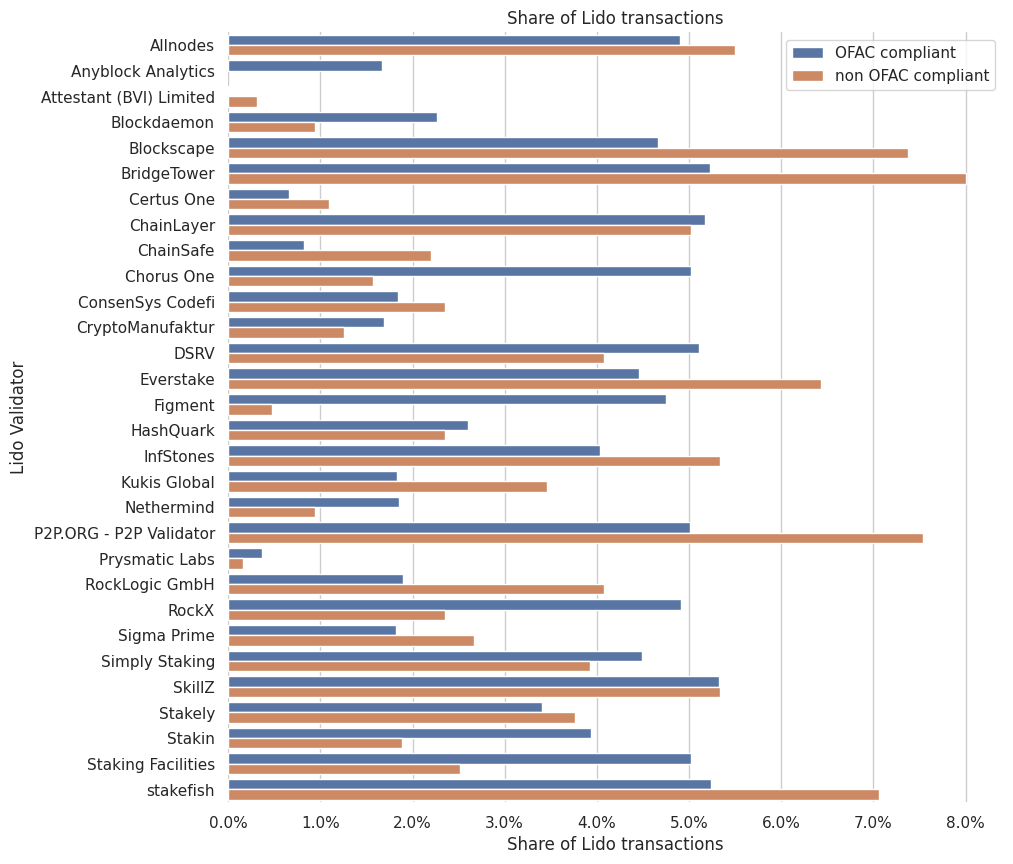

In [34]:
import matplotlib.ticker as mtick

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=lido_validators_total_tx, y="validator_name", x="tx_hash", hue="is_ofac")
ax.set_xlabel("Share of Lido transactions")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylabel("Lido Validator")
sns.despine(left=True, bottom=True)
plt.legend(loc=1)
plt.title('Share of Lido transactions')
ax = plt.gca()
ax.grid(True, axis='x')
plt.show()

## А теперь построим графики, для долей каждого валидатора Lido в транзакций OFAC/NON OFAC для всех транзакций ETH

In [36]:
lido_tx = tr_data[tr_data['validator_type'] == 'Lido']
lido_validators_total_tx = lido_tx.groupby(['validator_name', 'is_ofac']).agg({'tx_hash': 'count'}).reset_index()

# lido_validators_total_tx['is_ofac'] = lido_validators_total_tx['is_ofac'].apply(lambda x: 'OFAC' if x else 'NON OFAC')

total_tx = len(tr_data)
total_ofac_tx = len(tr_data[tr_data['is_ofac'] == 'non OFAC compliant'])
print(f'Total tx: {total_tx}, total OFAC tx: {total_ofac_tx}')

Total tx: 11527306, total OFAC tx: 2258


In [37]:
lido_validators_total_tx.loc[lido_validators_total_tx['is_ofac'] == 'non OFAC compliant', 'tx_hash'] /= total_ofac_tx
lido_validators_total_tx.loc[lido_validators_total_tx['is_ofac'] =='OFAC compliant', 'tx_hash'] /= (total_tx - total_ofac_tx)

# lido_validators_total_tx.loc[lido_validators_total_tx['is_ofac'] == 'non OFAC compliant', 'tx_hash'] /= lido_validators_total_tx[lido_validators_total_tx['is_ofac'] == 'non OFAC compliant']['tx_hash'].sum()
# lido_validators_total_tx.loc[lido_validators_total_tx['is_ofac'] == 'OFAC compliant', 'tx_hash'] /= lido_validators_total_tx[lido_validators_total_tx['is_ofac'] == 'OFAC compliant']['tx_hash'].sum()


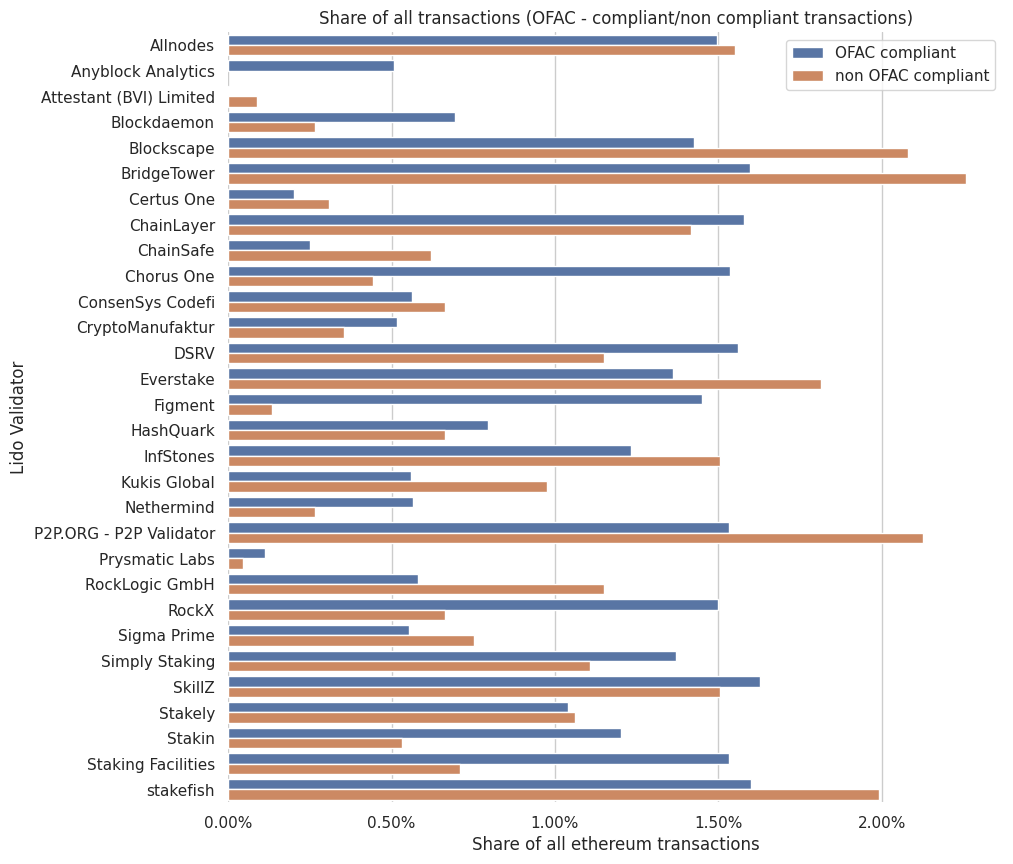

In [43]:
import matplotlib.ticker as mtick

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=lido_validators_total_tx, y="validator_name", x="tx_hash", hue="is_ofac")
ax.set_xlabel("Share of all ethereum transactions")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax.set_ylabel("Lido Validator")
sns.despine(left=True, bottom=True)
plt.legend(loc=1)
plt.title('Share of all transactions (OFAC - compliant/non compliant transactions)')
ax = plt.gca()
ax.grid(True, axis='x')
plt.show()

### <font color='green'>Предварительные выводы:</font> 

<font color='green'> 1. Если оранжевый столбец > синего - это значит что вклад валидатора в нейтральность больше среднего, то есть он сам не цензуриует, и берет блоки либо у всех mev relays, либо у всех mev relaye кто не цензурирует</font><br>
<font color='green'> 2. Если оранжевого столбца нет - значит валидатор цензурирует - берет только у цензурирующих mev relays</font><br>
<font color='green'> 3. Если оранжевый столбец < синего - это значит что вклад валидатора в нейтральность меньше среднего, жесткой цензуры нет, но не берет блоки у каких-то mev relays без цензуры (а у каких-то берет)</font>

# Посмотрим есть ли зависимость от занятости сети

In [46]:
tr_data.columns

Index(['tx_hash', 'from', 'to', 'gas', 'gasPrice', 'blockNumber',
       'timestamp_x', 'miner', 'timestamp_y', 'waiting', 'validator',
       'public_key', 'validator_name', 'validator_address',
       'pub_key_lido_status', 'validator_type', 'eth_datetime', 'eth_hour',
       'is_contract_transaction', 'baseFeePerGas', 'wait_time_adjusted',
       'is_ofac', 'priority_fee'],
      dtype='object')

In [47]:
ts_baseFeePerGas = tr_data[['blockNumber', 'timestamp_x', 'baseFeePerGas']].groupby('blockNumber').agg('first')

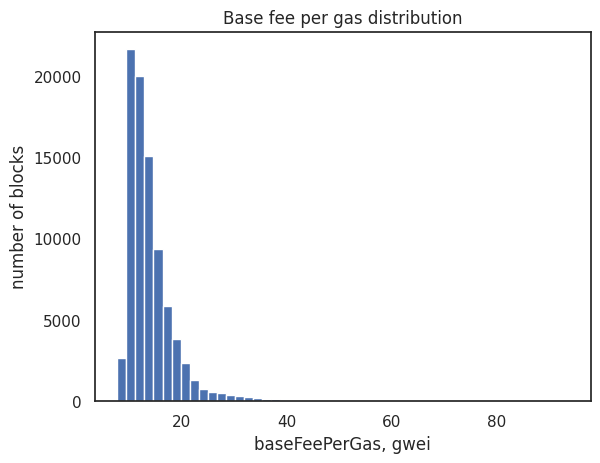

In [48]:
plt.hist(ts_baseFeePerGas['baseFeePerGas'], bins=50)
plt.title('Base fee per gas distribution')
plt.xlabel('baseFeePerGas, gwei')
plt.ylabel('number of blocks')
plt.show()

In [49]:
percentile_33 = np.percentile(ts_baseFeePerGas['baseFeePerGas'], 33)
print(f'33 percentile of base fee for gas: {percentile_33}')
percentile_66 = np.percentile(ts_baseFeePerGas['baseFeePerGas'], 66)
print(f'66 percentile of base fee for gas: {percentile_66}')
percentile_99 = np.percentile(ts_baseFeePerGas['baseFeePerGas'], 99)
print(f'99 percentile of base fee for gas: {percentile_99}')

33 percentile of base fee for gas: 11.45275212927
66 percentile of base fee for gas: 14.25104546272
99 percentile of base fee for gas: 35.95693436279992


In [50]:
low = 12
high = 20

In [51]:
ts_baseFeePerGas['time'] = ts_baseFeePerGas['timestamp_x'].apply(datetime.fromtimestamp)

In [52]:
ofac_by_ts = tr_data[tr_data['is_ofac']][['timestamp_x', 'tx_hash']].groupby(['timestamp_x']).agg('count').reset_index()
ofac_by_ts['time'] = ofac_by_ts['timestamp_x'].apply(datetime.fromtimestamp)

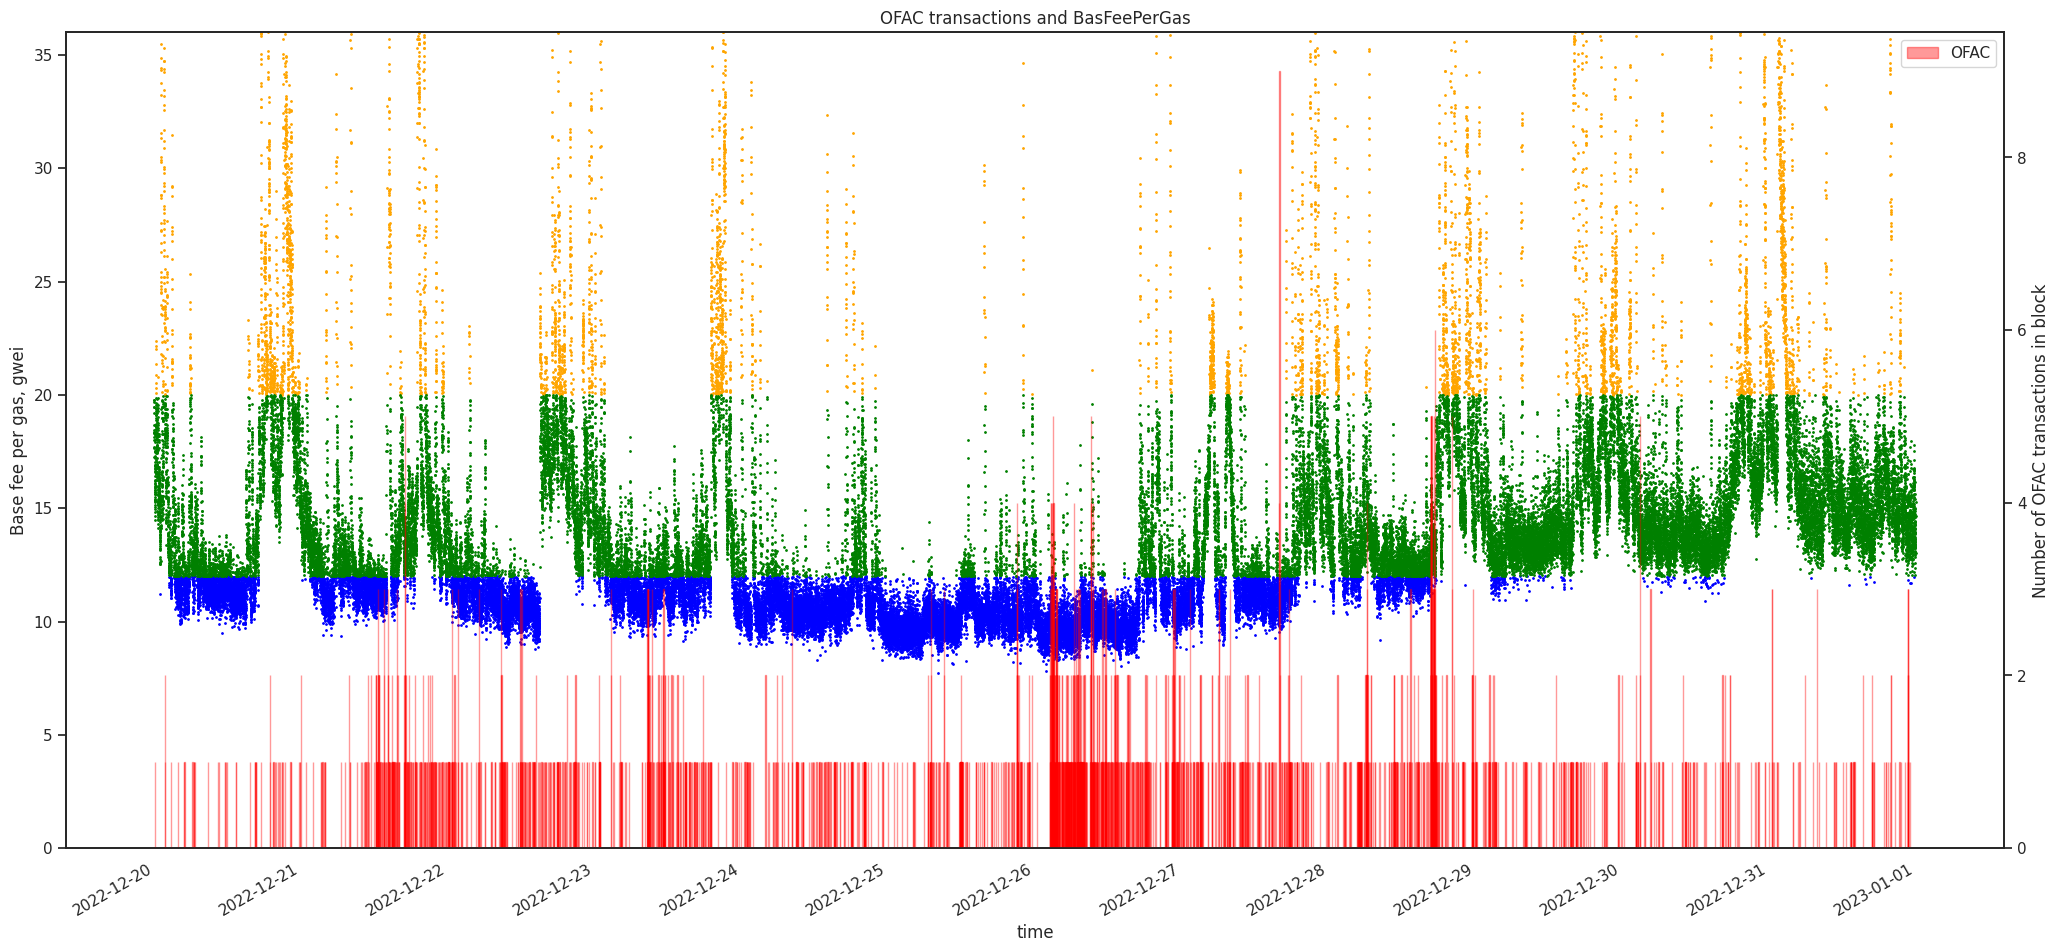

In [53]:
_ = plt.figure(figsize=(25, 12))
ax = plt.subplot()
ax.scatter("time", "baseFeePerGas",
           # hue="region", style="event",
           color='blue',
           data=ts_baseFeePerGas[ts_baseFeePerGas['baseFeePerGas'] < low], s=1)
ax.scatter("time", "baseFeePerGas",
           # hue="region", style="event",
           color='orange',
           data=ts_baseFeePerGas[ts_baseFeePerGas['baseFeePerGas'] > high], s=1)
ax.scatter("time", "baseFeePerGas",
           # hue="region", style="event",
           color='green',
           data=ts_baseFeePerGas[ts_baseFeePerGas['baseFeePerGas'].between(low, high)], s=1)
ax.set_ylim(0, np.ceil(percentile_99))
ax.set_ylabel('Base fee per gas, gwei')
ax.set_xlabel('time')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax_sec = ax.twinx()
# ax_sec.set_ylim(0, 20)
ax_sec.bar(ofac_by_ts['time'], ofac_by_ts['tx_hash'], color='red', edgecolor='red', width=0.001, label='OFAC', alpha=0.4)
ax_sec.set_ylabel('Number of OFAC transactions in block')
# ax_sec.scatter(ofac_by_ts['time'], ofac_by_ts['tx_hash'], color='red', label='OFAC')
plt.gcf().autofmt_xdate()
plt.legend(loc=1)
plt.title('OFAC transactions and BasFeePerGas')
plt.show()

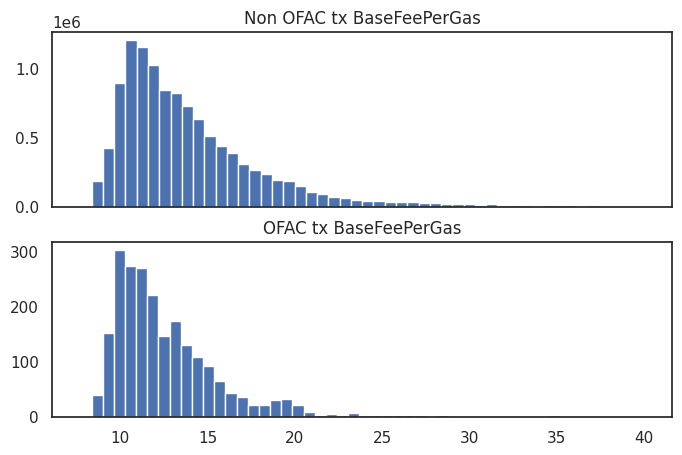

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)
axes[0].hist(tr_data[(~tr_data['is_ofac']) & (tr_data['baseFeePerGas'] < 40)]['baseFeePerGas'], bins=50)
axes[0].set_title('Non OFAC tx BaseFeePerGas')
axes[1].hist(tr_data[(tr_data['is_ofac']) & (tr_data['baseFeePerGas'] < 40)]['baseFeePerGas'], bins=50)
axes[1].set_title('OFAC tx BaseFeePerGas')
plt.show()

## <font color='green'>Закономерностей не найдено</font>

## Восстановим состояние мемпула по транзакциям, попавшим в БЧ (это не совсем правильно - но пока так)

# Добавим доп информацию о транзакциях в датасет и пересохраним

In [3]:
# with open('additional_tx_data_nonce.pickle', 'rb') as f:
#     additional_tx_data = pickle.load(f)

# assert len(additional_tx_data) == len(tr_data)

In [4]:
# for col in ['nonce']:
#     tr_data[col] = tr_data['tx_hash'].apply(lambda x: additional_tx_data[x][col])

In [ ]:
# tr_data['maxFeePerGas'] = tr_data['maxFeePerGas'] / 10**9
# tr_data['maxPriorityFeePerGas'] = tr_data['maxPriorityFeePerGas'] / 10**9
# tr_data['effectiveGasPrice'] = tr_data['effectiveGasPrice'] / 10**9

In [10]:
tr_data.to_csv('data/merged_221220_221231_with_contracts.csv', index=False)

In [9]:
tr_data.head()

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,is_contract_transaction,baseFeePerGas,wait_time_adjusted,is_ofac,priority_fee,maxFeePerGas,maxPriorityFeePerGas,gasUsed,effectiveGasPrice,nonce
0,0x14e970dba71ef93b42f337d3494c4d6e8fee4d83ce38...,0x498B859D2e59958E209d7DD262324C8D31b12B12,0xC1E088fC1323b20BCBee9bd1B9fC9546db5624C5,242494,117.114005,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,True,17.248596,0.0,False,99.865409,117.114005,117.114005,189564,117.114005,12269
1,0x33fcc824c05553a3ec31a7d71dc6dbb26cf51d608009...,0x07B873DE48807ec7B02B38cc31b4f96a6A507182,0x883B01205b938EC7268286d13Cb40a2045D2E78F,800000,23.932889,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,True,17.248596,0.0,False,6.684293,23.932889,23.932889,214272,23.932889,907
2,0x555ffb08812804e23fe18467886edaa167f502488c6b...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,305170,17.248596,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,True,17.248596,0.0,False,0.000000,17.248596,17.248596,152585,17.248596,1689
3,0x9febfdc63677cd0decb532cb049004add2959d7f1a1f...,0xf7C8133baEa3313993B3c476c016aa869C991679,0x91c8D7e4080bed28e26FCE1b87cACcFaF7bbF794,292432,18.212433,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671484e+09,3.0,...,True,17.248596,3.0,False,0.963838,0.000000,0.000000,208202,18.212433,19
4,0xe24c2fb8e8d581d86710a0ca685e27ed6c36ca722d8e...,0xAC813c6b767F3C2f1764994F9D3E4D38A8df6F32,0x0b382C0A00D6080b0009F003C050eAC3c30f0000,245026,20.798797,16221291,1671483611,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,NaN,NaN,...,True,17.248596,0.0,False,3.550201,20.798797,20.798797,122513,20.798797,1690


In [11]:
tr_data.columns

Index(['tx_hash', 'from', 'to', 'gas', 'gasPrice', 'blockNumber',
       'timestamp_x', 'miner', 'timestamp_y', 'waiting', 'validator',
       'public_key', 'validator_name', 'validator_address',
       'pub_key_lido_status', 'validator_type', 'eth_datetime', 'eth_hour',
       'is_contract_transaction', 'baseFeePerGas', 'wait_time_adjusted',
       'is_ofac', 'priority_fee', 'maxFeePerGas', 'maxPriorityFeePerGas',
       'gasUsed', 'effectiveGasPrice', 'nonce'],
      dtype='object')

In [22]:
# block_number = 16221292
# block_ts = blocks_info[block_number]['timestamp']

# transactions_already_included = tr_data[tr_data['blockNumber'] < block_number]
# transactions_seen_before = tr_data[tr_data['timestamp_y'] < block_ts]

# print(f'Transaction included in blocks before this: {len(transactions_already_included)}')
# print(f'Transaction first seen before this block: {len(transactions_seen_before)}')

In [23]:
# gas_limit = blocks_info[block_number]['gasLimit']
# gas_used = blocks_info[block_number]['gasUsed']
# baseFePerGas = blocks_info[block_number]['baseFeePerGas'] / 10 ** 9

# print(f'Block number: {block_number} ts: {block_ts}')
# print(f'Block gas limit: {gas_limit}')
# print(f'Block gas used: {gas_used}')
# print(f'Block baseFeePerGas: {baseFePerGas}')
# print(f'Block number of tx: {len(blocks_info[block_number]["transactions"])}')

In [24]:
# eligible_transactions = transactions_seen_before[(transactions_seen_before['maxFeePerGas'] >= baseFePerGas)
#                                                  & (transactions_seen_before['blockNumber'] >= block_number)].copy()
# print(f'Total eligible transactions: {len(eligible_transactions)}')

In [25]:
# eligible_transactions['residualFeePerGas'] = eligible_transactions['maxFeePerGas'] - baseFePerGas
# eligible_transactions['availablePriorityFee'] = eligible_transactions[['residualFeePerGas', 'maxPriorityFeePerGas']].min(axis=1)
# eligible_transactions['naive_fee'] = eligible_transactions['availablePriorityFee'] * eligible_transactions['gasUsed'] / 10**9
# eligible_transactions['already_waiting'] = block_ts - eligible_transactions['timestamp_y']
# eligible_transactions.sort_values('naive_fee', ascending=False, inplace=True)
# eligible_transactions['priority_number'] = range(len(eligible_transactions))

In [26]:
# current_block_tx = eligible_transactions[(eligible_transactions['blockNumber'] == block_number)].copy()
# next_block_tx = eligible_transactions[(eligible_transactions['blockNumber'] == block_number + 1)].copy()
# after_next_block_tx = eligible_transactions[(eligible_transactions['blockNumber'] > block_number + 1)].copy()

# print(f'Current: {len(current_block_tx)}, next: {len(next_block_tx)}. after next: {len(after_next_block_tx)}')

In [20]:
current_block_tx['already_waiting'].value_counts().sort_index()

4.0      1
5.0     11
7.0     22
8.0     27
9.0     18
10.0    13
11.0    27
12.0     9
15.0     5
18.0     1
20.0     1
23.0     1
Name: already_waiting, dtype: int64

In [21]:
next_block_tx['already_waiting'].value_counts().sort_index()

1.0    35
2.0    52
3.0    54
4.0    25
5.0    13
7.0     4
Name: already_waiting, dtype: int64

## <font color='green'> Гипотеза: граница проходит на 5 секунде - блок создается около 5 секунд (Вася подтвердил) </font>

## Соберем все вместе

In [46]:
tx_by_address = tr_data[['from', 'tx_hash', 'nonce', 'blockNumber']].groupby(['from', 'tx_hash']).agg({'nonce': 'first', 'blockNumber': 'first'})

In [47]:
tx_by_address.loc['0xC7D4Fa468Fa402EE938b7838263Dece5C7ee549F']

,nonce,blockNumber
tx_hash,,
0x01ecdaf032d956d72e88758f5d3231f52f363a837dbdc4284ec0cd5a3a44d620,38,16243042
0x5f4ca69a7cf662c98ff5e03a3c3711c79bbcfc3bbb6cc7979dd8e529e4a94666,37,16240370
0x91d1128e35b987d04c3209b5817d899a2fe92e4887e44e06c75cbdb87e46a287,39,16243839
0xb189cf1745173cf4c1833b16bab0565790e3bcf88e64df9d307dc67eb79492d4,43,16296607
0xb2ea0e05d9f2a90800537f9caf16ef2b3f3efef80377debc9471e8cb1d17db8b,40,16249622
0xcea38091d99a0a335bd4eb0aab37c0a82c38f0f0c1f6f47a12fa84c5a33218ad,41,16296515
0xf8bcf9641eb6bf360c70c48ecf7ba8452991c2059d917f20f55e5eaef7357f2d,42,16296602


# Если транзакции старого типа - то поставим maxFeePerGas и maxPriorityFeePerGas == gasPrice

In [48]:
tr_data.loc[tr_data['maxFeePerGas'] == 0, 'maxFeePerGas'] = tr_data.loc[tr_data['maxFeePerGas'] == 0, 'gasPrice']
tr_data.loc[tr_data['maxPriorityFeePerGas'] == 0, 'maxPriorityFeePerGas'] = tr_data.loc[tr_data['maxPriorityFeePerGas'] == 0, 'maxFeePerGas']

In [49]:
len(tr_data[tr_data['maxFeePerGas'] == 0])

0

In [50]:
len(tr_data[tr_data['maxPriorityFeePerGas'] == 0])

0

In [263]:
censorship_info = {}

block_number = 16221292

block_censorhip = {}
block_ts = blocks_info[block_number]['timestamp']
baseFeePerGas = blocks_info[block_number]['baseFeePerGas'] / 10 ** 9

transactions_already_included = tr_data[tr_data['blockNumber'] < block_number]
transactions_seen_before = tr_data[tr_data['timestamp_y'] < block_ts]


eligible_transactions = transactions_seen_before[(transactions_seen_before['maxFeePerGas'] >= baseFePerGas)
                                                 & (transactions_seen_before['blockNumber'] >= block_number)].copy()
eligible_transactions['residualFeePerGas'] = eligible_transactions['maxFeePerGas'] - baseFePerGas
eligible_transactions['availablePriorityFee'] = eligible_transactions[['residualFeePerGas', 'maxPriorityFeePerGas']].min(axis=1)
eligible_transactions['naive_fee'] = eligible_transactions['availablePriorityFee'] * eligible_transactions['gasUsed'] / 10**9
eligible_transactions['already_waiting'] = block_ts - eligible_transactions['timestamp_y']
eligible_transactions.sort_values('naive_fee', ascending=False, inplace=True)
eligible_transactions['priority_number'] = range(len(eligible_transactions))

current_block_tx = eligible_transactions[(eligible_transactions['blockNumber'] == block_number)].copy()
next_block_tx = eligible_transactions[(eligible_transactions['blockNumber'] == block_number + 1)].copy()
after_next_block_tx = eligible_transactions[(eligible_transactions['blockNumber'] > block_number + 1)].copy()

# Собираем информацию о времени ожидания транзакций включенных в текущий и следующий блок
# Нас тут интересуют только транзакции со временем ожидания менее 13 секунд
# Исследуем транзакции, которые реально не успели в текущий блок и сразу попали в следующий
next_two_blocks_tx = pd.concat([current_block_tx, next_block_tx])
for i in range(13):
    total_tx_waiting = (next_two_blocks_tx['already_waiting'] == i).sum()
    current_block_included = (current_block_tx['already_waiting'] == i).sum()
    next_block_included = (next_block_tx['already_waiting'] == i).sum()
    block_censorhip[f'next_2_blocks_{i}_sec_wait'] = total_tx_waiting
    block_censorhip[f'current_block_{i}_sec_wait'] = current_block_included
    block_censorhip[f'next_block_{i}_sec_wait'] = next_block_included

# Анализ не попавших в этот и следующий блок транзакций (используем nonce)
suspicious_txs = []
for i, row in after_next_block_tx.iterrows():
    address_transactions = tx_by_address.loc[row['from']]
    blocking_transactions = address_transactions[address_transactions['nonce'] < row['nonce']]
    if len(blocking_transactions) ==0 or blocking_transactions['blockNumber'].max() <= block_number:
        suspicious_txs.append(
            {
                'tx_hash': row['tx_hash'],
                'block_ready': block_number,
                'block_actual': row['blockNumber'],
                'priority_idx': row['priority_number']
            })

censorship_info[block_number] = block_censorhip

In [267]:
len(after_next_block_tx)

414

In [264]:
# suspicious_txs

In [291]:
import web3
from web3 import Web3, HTTPProvider, IPCProvider 

geth_ipc = '/media/Warehouse/Warehouse/Ethereum/data/.ethereum/geth.ipc'
w3 = Web3(IPCProvider(geth_ipc))
w3_drpc = Web3(HTTPProvider('https://main.drpc.org/ogrpc?network=ethereum&dkey=AhVPNnFg1020t9FEr-MKVyPunnyCo98R7bAt5s-wSZOx'))
print ("Latest Ethereum block number DRPC" , w3_drpc.eth.blockNumber)
print ("Latest Ethereum block number" , w3.eth.blockNumber)

Latest Ethereum block number DRPC 16560443
Latest Ethereum block number 16560443


In [266]:
tr_data.columns

Index(['tx_hash', 'from', 'to', 'gas', 'gasPrice', 'blockNumber',
       'timestamp_x', 'miner', 'timestamp_y', 'waiting', 'validator',
       'public_key', 'validator_name', 'validator_address',
       'pub_key_lido_status', 'validator_type', 'eth_datetime', 'eth_hour',
       'is_contract_transaction', 'baseFeePerGas', 'wait_time_adjusted',
       'is_ofac', 'priority_fee', 'maxFeePerGas', 'maxPriorityFeePerGas',
       'gasUsed', 'effectiveGasPrice', 'nonce'],
      dtype='object')

## Для транзакций, которые не попали в текущий и следующий блоки получаем информацию об аккаунтах

In [150]:
tx_additional_details = {}

for i, row in tqdm.tqdm(after_next_block_tx.iterrows()):
    account_balance = w3_drpc.eth.get_balance(row['from'], block_number) / 10 ** 18
    n_account_transactions = w3_drpc.eth.get_transaction_count(row['from'], block_number)
    tx_additional_details[row['tx_hash']] = {
        'tx_count': n_account_transactions,
        'account_balance': account_balance
    }

414it [02:17,  3.01it/s]


In [151]:
len(tx_additional_details)

414

In [152]:
# with open(f'block_{block_number}_address_details.pickle', 'wb') as f:
#     pickle.dump(tx_additional_details, f)

In [36]:
with open(f'block_{block_number}_address_details.pickle', 'rb') as f:
    tx_additional_details = pickle.load(f)
len(tx_additional_details)

414

In [53]:
from web3.exceptions import ContractLogicError

# Оптимизируем

In [196]:
after_next_block_tx[after_next_block_tx['tx_hash'] == '0xf0a35aa424960afe4886370e2e3d6310def3cbb613f05c80b7b523ca78446082']

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,maxFeePerGas,maxPriorityFeePerGas,gasUsed,effectiveGasPrice,nonce,residualFeePerGas,availablePriorityFee,naive_fee,already_waiting,priority_number
4106265,0xf0a35aa424960afe4886370e2e3d6310def3cbb613f0...,0xAaaB380BfD60FE8aAC7B351251E3310710AA7559,0x957f978e06b958418E6c4F5Aa4216342eA4BE988,127407,11.724849,16250338,1671833579,0x6d2e03b7EfFEae98BD302A9F836D0d6Ab0002766,1.671395e+09,438299.0,...,27.050388,1.5,38920,11.724849,193,8.747486,1.5,0.000058,88343.0,395


In [197]:
after_next_block_tx[after_next_block_tx['from'] == '0xAaaB380BfD60FE8aAC7B351251E3310710AA7559']

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,maxFeePerGas,maxPriorityFeePerGas,gasUsed,effectiveGasPrice,nonce,residualFeePerGas,availablePriorityFee,naive_fee,already_waiting,priority_number
4106435,0x0cda141d3ce686815202b69dab747f690d2aa7c357b7...,0xAaaB380BfD60FE8aAC7B351251E3310710AA7559,0x957f978e06b958418E6c4F5Aa4216342eA4BE988,133407,12.038393,16250339,1671833591,0x600DdD8bdE9fb00DE5a325c560DBF75e616d0c3F,1.671395e+09,438311.0,...,23.625875,2.0,38920,12.038393,196,5.322973,2.0,0.000078,88343.0,274
4106266,0x6ff1e0807709112bb3ebb9171b6c42839a1bdbcf615c...,0xAaaB380BfD60FE8aAC7B351251E3310710AA7559,0x957f978e06b958418E6c4F5Aa4216342eA4BE988,133407,11.724849,16250338,1671833579,0x6d2e03b7EfFEae98BD302A9F836D0d6Ab0002766,1.671395e+09,438299.0,...,25.218845,1.5,38920,11.724849,194,6.915943,1.5,0.000058,88343.0,394
4106265,0xf0a35aa424960afe4886370e2e3d6310def3cbb613f0...,0xAaaB380BfD60FE8aAC7B351251E3310710AA7559,0x957f978e06b958418E6c4F5Aa4216342eA4BE988,127407,11.724849,16250338,1671833579,0x6d2e03b7EfFEae98BD302A9F836D0d6Ab0002766,1.671395e+09,438299.0,...,27.050388,1.5,38920,11.724849,193,8.747486,1.5,0.000058,88343.0,395
4106264,0xa8475fb2ab2356f43a8bceaa1f175a3a327a687b226a...,0xAaaB380BfD60FE8aAC7B351251E3310710AA7559,0x957f978e06b958418E6c4F5Aa4216342eA4BE988,116407,11.724849,16250338,1671833579,0x6d2e03b7EfFEae98BD302A9F836D0d6Ab0002766,1.671395e+09,438299.0,...,29.593315,1.5,38920,11.724849,192,11.290413,1.5,0.000058,88343.0,396
4106434,0xa6310318574cb7b10302077a76bae4cc44ffd59e1267...,0xAaaB380BfD60FE8aAC7B351251E3310710AA7559,0x957f978e06b958418E6c4F5Aa4216342eA4BE988,104407,11.538393,16250339,1671833591,0x600DdD8bdE9fb00DE5a325c560DBF75e616d0c3F,1.671395e+09,438311.0,...,32.479565,1.5,38920,11.538393,195,14.176663,1.5,0.000058,88343.0,397


In [123]:
cached_address_balances = {}
cached_address_n_transactions = {}
for k, details in tx_additional_details.items():
    address = after_next_block_tx[after_next_block_tx['tx_hash'] == k]['from'].to_list()[0]
    cached_address_balances[address] = details['account_balance']
    cached_address_n_transactions[address] = details['tx_count']

In [231]:
# Оставим только те, для которых в мем пуле и в блокчейне нет транзакций с предыдущими nonce
import time

transaction_statuses = {}


def prepare_tx_to_gas_est(tx_hash):
    transactions_for_est = w3.eth.get_transaction(tx_hash)
    transactions_for_est = dict(**transactions_for_est)
    if 'value' in transactions_for_est:
        transactions_for_est['value'] = str(transactions_for_est['value'])
    del transactions_for_est['hash']
    del transactions_for_est['blockHash']
    del transactions_for_est['blockNumber']
    del transactions_for_est['r']
    del transactions_for_est['s']
    if 'maxFeePerGas' in transactions_for_est:
        del transactions_for_est['gasPrice']
    return transactions_for_est


def get_transaction_status(address, tx_hash, transaction, address_transaction_number, account_balance, block_number, baseFeePerGas):
    global time_waiting
    tx_nonce = transaction['nonce']
    # print(f'tx_nonce: {tx_nonce}, address_transaction_number {address_transaction_number}'  )
    if tx_nonce > address_transaction_number:
        # транзакция всего одна, поэтому точно не может попасть в блок
        return 'high_nonce'
    # nonce подходящий -> проверим что транзакция выполнима
    # prepare tx
    transactions_for_est = prepare_tx_to_gas_est(tx_hash)
    # check gas estimate
    try:
        # ПОКА ЗАМЕНИМ
        # est_gas = w3_drpc.eth.estimate_gas(transactions_for_est, block_number - 1)
        est_gas = w3.eth.get_transaction(tx_hash)['gas']
        est_gas_price = transaction['availablePriorityFee'] + baseFeePerGas
        est_fee = est_gas * est_gas_price / 10 ** 9

        if account_balance - est_fee < 0.001:
            # Совсем мало эфира остается
            return 'low_eth'
        else:
            return 'ok'
    except ContractLogicError as e:
        # Ошибка в логике контракта - эта и все остальны транзакции не могут быть включены в блок
        return f'contract_logic_error'
    except ValueError as e:
        # Не хватает газа для транзакции - эта и все остальны транзакции не могут быть включены в блок
        return f'{e.args[0]["message"]}_code: {e.args[0]["code"]}'

    
grouped_txs = after_next_block_tx.groupby(['from', 'tx_hash']).agg('first')
for address in tqdm.tqdm(grouped_txs.index.get_level_values('from').unique()):
    transactions_from_addr = grouped_txs.loc[address].sort_values('nonce', ascending=True)
    # address_transaction_number = w3_drpc.eth.get_transaction_count(address, block_number - 1)
    # account_balance = w3_drpc.eth.get_balance(address, block_number - 1) / 10 ** 18
    address_transaction_number = cached_address_n_transactions[address]
    account_balance = cached_address_balances[address]

    if len(transactions_from_addr) == 1:
        # 1 transaction from address
        tx_hash = transactions_from_addr.index[0]
        transaction = transactions_from_addr.iloc[0]

        transaction_statuses[tx_hash] = get_transaction_status(
            address, tx_hash, transaction, address_transaction_number, account_balance, block_number, baseFeePerGas)
        # continue

    else:
        # Транзакций с адреса больше чем одна
        for i, (tx_hash, transaction) in enumerate(transactions_from_addr.iterrows()):
            status = get_transaction_status(
                address, tx_hash, transaction, address_transaction_number, account_balance, block_number, baseFeePerGas)
            transaction_statuses[tx_hash] = status

            if status != 'ok':
                # Нужно проставить этот же статус всем остальным транзакциям с этого адреса
                break
        for tx_hash in transactions_from_addr.index[i + 1:]:
            transaction_statuses[tx_hash] = f'{status}_propagated'


print(f'Всего транзакций: {len(after_next_block_tx)}')
print(f'Статусов выставлено: {len(transaction_statuses)}')

100%|██████████████████████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 687.31it/s]

Всего транзакций: 414
Статусов выставлено: 414


In [229]:
for k, v in transaction_statuses_full.items():
    if  v != transaction_statuses[k]:
        if v.startswith('fee cap less than block base fee'):
            continue
        print(f'{k} {v} {transaction_statuses[k]}')

In [258]:
ofac_txs = tr_data[tr_data['is_ofac'] == True].copy()
# Соберем номера блоков, которые нам интересны (должны содержать в мемпуле ofac транзакции)
ofac_txs.head()
interesting_blocks = set()

for i, row in ofac_txs.iterrows():
    block_with_ofac = row['blockNumber']
    waiting_time = row['wait_time_adjusted']
    n_blocks_before = int(waiting_time) // 12 + 1
    new_interesting_blocks = list(range(block_with_ofac, block_with_ofac - n_blocks_before - 1, -1))
    interesting_blocks.update(new_interesting_blocks)

interesting_blocks = sorted(interesting_blocks)

In [284]:
first_block = tr_data['blockNumber'].min()
first_20_blocks = list(range(first_block + 1, first_block + 21))

interesting_blocks = set(interesting_blocks)
interesting_blocks.update(first_20_blocks)
interesting_blocks = sorted(interesting_blocks)

In [ ]:
for b_number in tqdm.tqdm(interesting_blocks[155:]):
    block_censorhip = {}
    block_ts = blocks_info[b_number]['timestamp']
    baseFeePerGas = blocks_info[b_number]['baseFeePerGas'] / 10 ** 9

    transactions_already_included = tr_data[tr_data['blockNumber'] < b_number]
    transactions_seen_before = tr_data[tr_data['timestamp_y'] < block_ts]

    eligible_transactions = transactions_seen_before[(transactions_seen_before['maxFeePerGas'] >= baseFePerGas)
                                                     & (transactions_seen_before['blockNumber'] >= b_number)].copy()
    eligible_transactions['residualFeePerGas'] = eligible_transactions['maxFeePerGas'] - baseFePerGas
    eligible_transactions['availablePriorityFee'] = eligible_transactions[['residualFeePerGas', 'maxPriorityFeePerGas']].min(axis=1)
    eligible_transactions['naive_fee'] = eligible_transactions['availablePriorityFee'] * eligible_transactions['gasUsed'] / 10**9
    eligible_transactions['already_waiting'] = block_ts - eligible_transactions['timestamp_y']
    eligible_transactions.sort_values('naive_fee', ascending=False, inplace=True)
    eligible_transactions['priority_number'] = range(len(eligible_transactions))

    current_block_tx = eligible_transactions[(eligible_transactions['blockNumber'] == b_number)].copy()
    next_block_tx = eligible_transactions[(eligible_transactions['blockNumber'] == b_number + 1)].copy()
    after_next_block_tx = eligible_transactions[(eligible_transactions['blockNumber'] > b_number + 1)].copy()
    
    not_included = pd.concat([next_block_tx, after_next_block_tx])
    addresses = not_included['from'].unique()
    
    # Fetch and save account details
    
    account_details = {}

    for addr in addresses:
        account_balance = w3_drpc.eth.get_balance(addr, b_number - 1) / 10 ** 18
        n_account_transactions = w3_drpc.eth.get_transaction_count(addr, b_number - 1)
        account_details[addr] = {
            'tx_count': n_account_transactions,
            'account_balance': account_balance
        }
    with open(f'block_adresses_details/block_{b_number}_address_details.pickle', 'wb') as f:
        pickle.dump(account_details, f)

  0%|                                                                           | 9/8654 [48:02<753:27:07, 313.76s/it]

In [296]:
print(b_number)
interesting_blocks.index(b_number)

16227632


155

In [286]:
account_details

{'0x7196CF952d331d673e22E2eA782c262d8Cf0A523': {'tx_count': 417,
  'account_balance': 0.43527341540085385},
 '0xC864B0Ab18B0ED0BeAb72F915Bacb12971FDb73a': {'tx_count': 2012,
  'account_balance': 1.006581169474097},
 '0x16F2bACF87654067e6b0559bC8fFC09f3Cf1C5D1': {'tx_count': 2995,
  'account_balance': 2.127492422209613},
 '0x718d6166707c1880899AA2C924b15aBC3BF3f3be': {'tx_count': 956,
  'account_balance': 0.9147629888983496},
 '0x01c77F80c7D2765FBF94DADF5AF4C95eD95586c8': {'tx_count': 585,
  'account_balance': 0.37002176803216974},
 '0xED058C76E19927391ead2F556b82e402FaEAC154': {'tx_count': 608,
  'account_balance': 0.9074142557645601},
 '0x0216ac50FDb6b46F6B74254b84ecDd1d431d670C': {'tx_count': 235,
  'account_balance': 0.7036042118986913},
 '0xCD486efdDBCA4D4Ac9504F4272a7148376B36e94': {'tx_count': 2947,
  'account_balance': 0.4954214474257888},
 '0x171f87Cb27359622560124Ce86893B04C4c95Cfd': {'tx_count': 137,
  'account_balance': 1.1319255453378525},
 '0xD69D4C3E1169faf68246fcF8A997e9

In [254]:
first_block

16221291

In [236]:
16221817 - block_number

525

In [223]:
transaction_statuses['0x7e2ed3b4dac4c62c1641621b8db206db7f7c2c97a431bc9825520f3b75f61aeb']

'fee cap less than block base fee: address 0x0f7E86B377E2467deb1cdD67f04a339e9959d381, gasFeeCap: 18996184652 baseFee: 24841048832_code: 1'

In [224]:
transaction_statuses_full['0x7e2ed3b4dac4c62c1641621b8db206db7f7c2c97a431bc9825520f3b75f61aeb']

'low_eth'

In [205]:
transaction_statuses_full['0x7e2ed3b4dac4c62c1641621b8db206db7f7c2c97a431bc9825520f3b75f61aeb']

'fee cap less than block base fee: address 0x0f7E86B377E2467deb1cdD67f04a339e9959d381, gasFeeCap: 18996184652 baseFee: 25218114321_code: 1'

In [210]:
import time
import web3
from web3 import Web3, HTTPProvider, IPCProvider 

geth_ipc = '/media/Warehouse/Warehouse/Ethereum/data/.ethereum/geth.ipc'
w3 = Web3(IPCProvider(geth_ipc))
w3_drpc = Web3(HTTPProvider('https://main.drpc.org/ogrpc?network=ethereum&dkey=AhVPNnFg1020t9FEr-MKVyPunnyCo98R7bAt5s-wSZOx'))
print ("Latest Ethereum block number DRPC" , w3_drpc.eth.blockNumber)
print ("Latest Ethereum block number" , w3.eth.blockNumber)


tx_hash = '0x7e2ed3b4dac4c62c1641621b8db206db7f7c2c97a431bc9825520f3b75f61aeb'

print(f'Block number: {block_number}')
print(f'tx_hash: {tx_hash}')


def prepare_tx_to_gas_est(tx_hash):
    transactions_for_est = w3.eth.get_transaction(tx_hash)
    transactions_for_est = dict(**transactions_for_est)
    if 'value' in transactions_for_est:
        transactions_for_est['value'] = str(transactions_for_est['value'])
    del transactions_for_est['hash']
    del transactions_for_est['blockHash']
    del transactions_for_est['blockNumber']
    del transactions_for_est['r']
    del transactions_for_est['s']
    if 'maxFeePerGas' in transactions_for_est:
        del transactions_for_est['gasPrice']
    return transactions_for_est


transactions_for_est = prepare_tx_to_gas_est(tx_hash)
for n in range(10):
    # check gas estimate
    try:
        est_gas = w3_drpc.eth.estimate_gas(transactions_for_est, block_number - 1)
    except ValueError as e:
        print(f'{e.args[0]["message"]}_code: {e.args[0]["code"]}')
    
    time.sleep(10)

Block number: 16221292
tx_hash: 0x7e2ed3b4dac4c62c1641621b8db206db7f7c2c97a431bc9825520f3b75f61aeb
fee cap less than block base fee: address 0x0f7E86B377E2467deb1cdD67f04a339e9959d381, gasFeeCap: 18996184652 baseFee: 26790606377_code: 1
fee cap less than block base fee: address 0x0f7E86B377E2467deb1cdD67f04a339e9959d381, gasFeeCap: 18996184652 baseFee: 26576263889_code: 1
fee cap less than block base fee: address 0x0f7E86B377E2467deb1cdD67f04a339e9959d381, gasFeeCap: 18996184652 baseFee: 25865020392_code: 1
fee cap less than block base fee: address 0x0f7E86B377E2467deb1cdD67f04a339e9959d381, gasFeeCap: 18996184652 baseFee: 27922105985_code: 1
fee cap less than block base fee: address 0x0f7E86B377E2467deb1cdD67f04a339e9959d381, gasFeeCap: 18996184652 baseFee: 28076997585_code: 1
fee cap less than block base fee: address 0x0f7E86B377E2467deb1cdD67f04a339e9959d381, gasFeeCap: 18996184652 baseFee: 28076997585_code: 1
fee cap less than block base fee: address 0x0f7E86B377E2467deb1cdD67f04a3

In [211]:
transactions_for_est

{'from': '0x0f7E86B377E2467deb1cdD67f04a339e9959d381',
 'gas': 46119,
 'maxFeePerGas': 18996184652,
 'maxPriorityFeePerGas': 1500000000,
 'input': '0xa22cb4650000000000000000000000001e0049783f008a0085193e00003d00cd54003c710000000000000000000000000000000000000000000000000000000000000001',
 'nonce': 15,
 'to': '0xbaC489f0eA3d8ec96d52d3663390706587aa9556',
 'transactionIndex': 229,
 'value': '0',
 'type': '0x2',
 'accessList': [],
 'chainId': '0x1',
 'v': 1}

In [214]:
for k, v in transaction_statuses_full.items():
    if  v != transaction_statuses[k]:
        if v.startswith('fee cap less than block base fee'):
            continue
        print(f'{k} {v} {transaction_statuses[k]}')

0xf0a35aa424960afe4886370e2e3d6310def3cbb613f05c80b7b523ca78446082 low_eth_propagated high_nonce
0x6ff1e0807709112bb3ebb9171b6c42839a1bdbcf615c0c6015aca892ae024762 low_eth_propagated high_nonce_propagated
0xa6310318574cb7b10302077a76bae4cc44ffd59e12675355c28a6f095e16224f low_eth_propagated high_nonce_propagated
0x0cda141d3ce686815202b69dab747f690d2aa7c357b7700dd84135af529915da low_eth_propagated high_nonce_propagated


In [213]:
transaction_statuses_full['0xf0a35aa424960afe4886370e2e3d6310def3cbb613f05c80b7b523ca78446082']

'low_eth_propagated'

In [195]:
transaction_statuses['0xf0a35aa424960afe4886370e2e3d6310def3cbb613f05c80b7b523ca78446082']

'high_nonce'

In [ ]:
after_next_block_tx[]

In [264]:
after_next_block_tx['status'] = after_next_block_tx['tx_hash'].apply(lambda x: transaction_statuses[x])

In [266]:
after_next_block_tx[after_next_block_tx['status'] == 'low_eth']['tx_hash'].values

array(['0xa8475fb2ab2356f43a8bceaa1f175a3a327a687b226a1991ab1ff507bb3af58e',
       '0x50407177c78122a2d65594c018ca61bc425de72d68a27a57124619cc366d26cb',
       '0x33dec97bbeae1db73a924bf9cf4a0522c6e35456b894fb9055ea1ffea6d7ee4f'],
      dtype=object)

In [249]:
transactions_for_est = prepare_tx_to_gas_est('0xa8475fb2ab2356f43a8bceaa1f175a3a327a687b226a1991ab1ff507bb3af58e')
est_gas = w3_drpc.eth.estimate_gas(transactions_for_est, block_number - 1)
est_gas

In [250]:
est_gas

25070

In [251]:
tx_additional_details['0xa8475fb2ab2356f43a8bceaa1f175a3a327a687b226a1991ab1ff507bb3af58e']

{'tx_count': 192, 'account_balance': 0.0008406192897751}

In [254]:
baseFeePerGas

18.302901781

In [259]:
baseFeePerGas * est_gas / 10**9

0.00045885374764967

In [239]:
# est_gas = w3_drpc.eth.estimate_gas(transactions_for_est, block_number - 1)

In [217]:
state

'insufficient funds for transfer_code: 1'

In [226]:
same_address_txs

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,maxFeePerGas,maxPriorityFeePerGas,gasUsed,effectiveGasPrice,nonce,residualFeePerGas,availablePriorityFee,naive_fee,already_waiting,priority_number
830276,0x1c0f2ba3fe0abbb87875096ccfaa78ca1d11b95dba3d...,0xc3243dAcA6326dD6fd8B852f7C3A346d65246F38,0xEDe26cCC85ae521D06B5eF2604952a421c9124b6,57000,59.0,16227343,1671556607,0xDAFEA492D9c6733ae3d56b7Ed1ADB60692c98Bc5,1.671373e+09,183388.0,...,59.0,59.0,33229,59.0,64,40.697098,40.697098,0.001352,110404.0,34
830277,0xc96e255c94f0d588a9b0ccb1ccf00d707d9c44e7e824...,0xc3243dAcA6326dD6fd8B852f7C3A346d65246F38,0xEDe26cCC85ae521D06B5eF2604952a421c9124b6,57000,53.0,16227343,1671556607,0xDAFEA492D9c6733ae3d56b7Ed1ADB60692c98Bc5,1.671374e+09,183048.0,...,53.0,53.0,33205,53.0,65,34.697098,34.697098,0.001152,110064.0,38


In [148]:
after_next_block_tx[after_next_block_tx['from'] == '0x0640fbc40b1d460d5eb7a6b35cbb7d54a6a56b34']

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,maxFeePerGas,maxPriorityFeePerGas,gasUsed,effectiveGasPrice,nonce,residualFeePerGas,availablePriorityFee,naive_fee,already_waiting,priority_number


In [131]:
after_next_block_tx[after_next_block_tx['tx_hash'] == '0x2b3284ab66daceab10c636d7a269f4c5c1f0c73bad21b514d2b18c1f7ddabe71']

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,maxFeePerGas,maxPriorityFeePerGas,gasUsed,effectiveGasPrice,nonce,residualFeePerGas,availablePriorityFee,naive_fee,already_waiting,priority_number
1183591,0x2b3284ab66daceab10c636d7a269f4c5c1f0c73bad21...,0x0640Fbc40B1d460D5eB7A6b35CBB7D54A6A56b34,0xEBfCF2708F4DA3E07Eb55c8D599e97fEE4c2ACF5,110188,12.012671,16229805,1671586271,0xF2f5C73fa04406b1995e397B55c24aB1f3eA726C,1.671420e+09,166428.0,...,21.670023,1.5,28983,12.012671,21,3.367121,1.5,0.000043,63780.0,514


In [192]:
tx = w3.eth.get_transaction('0x1c0f2ba3fe0abbb87875096ccfaa78ca1d11b95dba3d583267694849230c30f1')
tx = dict(**tx)
if 'value' in tx:
    tx['value'] = str(tx['value'])
del tx['hash']
del tx['blockHash']
del tx['blockNumber']
del tx['r']
del tx['s']
if 'maxFeePerGas' in tx:
    del tx['gasPrice']
tx

{'from': '0xc3243dAcA6326dD6fd8B852f7C3A346d65246F38',
 'gas': 57000,
 'gasPrice': 59000000000,
 'input': '0xf1e03d67d8d5c327d27d449a8e975483e5d5f35600000000000000000000000000000000000000000000000000000000c3243daca6326dd6fd8b852f7c3a346d65246f38000000000000000000000000f1584b3c91b12064291949fdb04728dd77409cae00000000000000000000000000000000000000000000000001666b4850cf600000000000000000000000000000000000000000000000000000000000000000640000000000000000000000000000000000000000000000000000000000000a8c00000000000000000000000000000000000000000000000000000000639fc1d6000000000000000000000000000000000000000000000000000000000000001b8a3cbb286fe50229938e728400c11c21b61b65134b127408440474d092fcda9d3cf089454cb25693ac8b2e0ff4489c8532116a466951487e334594a765eb3123',
 'nonce': 64,
 'to': '0xEDe26cCC85ae521D06B5eF2604952a421c9124b6',
 'transactionIndex': 1,
 'value': '100886000000000000',
 'type': '0x0',
 'chainId': '0x1',
 'v': 37}

In [127]:
acc_transaction_number

4

In [116]:
censorship_info

{16221292: {'next_2_blocks_0_sec_wait': 0,
  'current_block_0_sec_wait': 0,
  'next_block_0_sec_wait': 0,
  'next_2_blocks_1_sec_wait': 35,
  'current_block_1_sec_wait': 0,
  'next_block_1_sec_wait': 35,
  'next_2_blocks_2_sec_wait': 52,
  'current_block_2_sec_wait': 0,
  'next_block_2_sec_wait': 52,
  'next_2_blocks_3_sec_wait': 54,
  'current_block_3_sec_wait': 0,
  'next_block_3_sec_wait': 54,
  'next_2_blocks_4_sec_wait': 26,
  'current_block_4_sec_wait': 1,
  'next_block_4_sec_wait': 25,
  'next_2_blocks_5_sec_wait': 24,
  'current_block_5_sec_wait': 11,
  'next_block_5_sec_wait': 13,
  'next_2_blocks_6_sec_wait': 0,
  'current_block_6_sec_wait': 0,
  'next_block_6_sec_wait': 0,
  'next_2_blocks_7_sec_wait': 26,
  'current_block_7_sec_wait': 22,
  'next_block_7_sec_wait': 4,
  'next_2_blocks_8_sec_wait': 27,
  'current_block_8_sec_wait': 27,
  'next_block_8_sec_wait': 0,
  'next_2_blocks_9_sec_wait': 18,
  'current_block_9_sec_wait': 18,
  'next_block_9_sec_wait': 0,
  'next_2_blo

In [89]:
tr_data[tr_data['from'] == '0x00000000000357848314F068fECA5D42e878a1d9']

,tx_hash,from,to,gas,gasPrice,blockNumber,timestamp_x,miner,timestamp_y,waiting,...,is_contract_transaction,baseFeePerGas,wait_time_adjusted,is_ofac,priority_fee,maxFeePerGas,maxPriorityFeePerGas,gasUsed,effectiveGasPrice,nonce
941940,0xc1c7bbddeb6ca8479243b8587535686448e0d44d566e...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,41.062485,16228050,1671565151,0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5,1.671479e+09,86467.0,...,False,20.332910,86467.0,False,20.729575,41.062485,27.374990,21000,41.062485,137
942101,0xb4de5954902c3b840f9ebf5454197273ca7e4ebc139c...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,65.934267,16228051,1671565163,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671565e+09,9.0,...,False,20.185220,9.0,False,45.749047,68.623571,45.749047,21000,65.934267,138
1974914,0xe61d5987cbce036ef8142c3d8e2ae9ef35bb5dcff27e...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,59.871498,16235238,1671651767,0x21539334f45Ac41Bd10789942b744a18a4775d6d,1.671565e+09,86611.0,...,False,14.122451,86611.0,False,45.749047,68.623571,45.749047,21000,59.871498,139
1975021,0x5b3091b98f3d7c572de380cb293222198c30cac182f7...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,45.560387,16235239,1671651779,0xBaF6dC2E647aeb6F510f9e318856A1BCd66C5e19,1.671652e+09,9.0,...,False,13.784873,9.0,False,31.775514,47.663271,31.775514,21000,45.560387,140
2984211,0xb0e8e6addda47d3cd18acd9a26a12290678c19f38aa2...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,45.835881,16242600,1671740495,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671652e+09,88723.0,...,False,14.060367,88723.0,False,31.775514,47.663271,31.775514,21000,45.835881,141
2984467,0x169db64395c83badf47a4ba4daa89b2bc834911ab37a...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,47.452910,16242601,1671740507,0x473780deAF4a2Ac070BBbA936B0cdefe7F267dFc,1.671741e+09,5.0,...,False,15.817085,5.0,False,31.635825,47.453737,31.635825,21000,47.452910,142
4049361,0xfc02ca49bb49e7d210917e327daf17c4179d85f357ec...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,46.264888,16249926,1671828635,0x95222290DD7278Aa3Ddd389Cc1E1d165CC4BAfe5,1.671740e+09,88147.0,...,False,12.940131,88147.0,False,33.324757,49.987136,33.324757,21000,46.264888,143
4049432,0xdb7379606c55aea11ff47e3f7297039b436aedd3f59f...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,41.328352,16249927,1671828647,0xFeebabE6b0418eC13b30aAdF129F5DcDd4f70CeA,1.671829e+09,10.0,...,False,12.213059,10.0,False,29.115294,43.672941,29.115294,21000,41.328352,144
5015554,0xe76c8b71f7c5d819cedfe7cd8fe8f6f9ad2f845de32d...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,38.306431,16257382,1671918515,0xeD33259a056F4fb449FFB7B7E2eCB43a9B5685Bf,1.671829e+09,89886.0,...,False,9.882788,89886.0,False,28.423644,42.635465,28.423644,21000,38.306431,145
5015709,0x3b753828c890a86197bbb1c8d4fe3a027e7250d45355...,0x00000000000357848314F068fECA5D42e878a1d9,0xe09F2dfa58369BCc7533c8CfD3F4b24692B323A6,21000,32.756236,16257383,1671918527,0x690B9A9E9aa1C9dB991C7721a92d351Db4FaC990,1.671919e+09,9.0,...,False,10.519964,9.0,False,22.236272,33.354408,22.236272,21000,32.756236,146


In [78]:
import web3
from web3 import Web3, HTTPProvider, IPCProvider 

geth_ipc = '/media/Warehouse/Warehouse/Ethereum/data/.ethereum/geth.ipc'
w3 = Web3(IPCProvider(geth_ipc))
# w3 = Web3(HTTPProvider('http://localhost:8545'))
print ("Latest Ethereum block number" , w3.eth.blockNumber)

Latest Ethereum block number 16542500


In [83]:
w3.eth.get_balance('0xCC850abe97204a34B2f8b701cEc7081Ab666fA2C') / 10 ** 18

2.997346786124127

In [262]:
w3.eth.get_transaction('0x577544f6848aff943fccd789bf2346f2af62b9383b7f4bfcf481a9220edff1ca')

AttributeDict({'blockHash': HexBytes('0x473a269d49c2c6801710c556557ecd2475a8366b716de183edac75c7acd6188b'),
 'blockNumber': 16247806,
 'from': '0x8692d4f5500E051Cc7bc63E67D8e23e7457cD884',
 'gas': 462904,
 'gasPrice': 27000000000,
 'maxFeePerGas': 27000000000,
 'maxPriorityFeePerGas': 27000000000,
 'hash': HexBytes('0x577544f6848aff943fccd789bf2346f2af62b9383b7f4bfcf481a9220edff1ca'),
 'input': '0xabcffc260000000000000000000000004fe5b965e3bd76eff36280471030ef9b0e6e2c1d000000000000000000000000000000000000000000000000000000000000008000000000000000000000000000000000000000000000000000000000000002400000000000000000000000000000000000000000000000000000000000000520000000000000000000000000eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0000000000000000000000007db5af2b9624e1b3b4bb69d6debd9ad1016a58ac000000000000000000000000000000000000000000000000000000000000012000000000000000000000000000000000000000000000000000000000000001600000000000000000000000008692d4f5500e051cc7bc63e67d8e23e7457cd884000000000000000

In [235]:
block_number

16221292

In [261]:
address_of_interest = '0xd5e2bc1fb479839f045eddc9b2e28143ed29d498'

for i, n in enumerate(range(w3.eth.blockNumber, block_number, -1)):
    print(f'{i} {n} {w3.eth.get_transaction_count(w3.toChecksumAddress(address_of_interest), n)}')

0 16535351 19
1 16535350 19
2 16535349 19
3 16535348 19
4 16535347 19
5 16535346 19
6 16535345 19
7 16535344 19
8 16535343 19
9 16535342 19
10 16535341 19
11 16535340 19
12 16535339 19
13 16535338 19
14 16535337 19
15 16535336 19
16 16535335 19
17 16535334 19
18 16535333 19
19 16535332 19
20 16535331 19
21 16535330 19
22 16535329 19
23 16535328 19
24 16535327 19
25 16535326 19
26 16535325 19
27 16535324 19
28 16535323 19
29 16535322 19
30 16535321 19
31 16535320 19
32 16535319 19
33 16535318 19
34 16535317 19
35 16535316 19
36 16535315 19
37 16535314 19
38 16535313 19
39 16535312 19
40 16535311 19
41 16535310 19
42 16535309 19
43 16535308 19
44 16535307 19
45 16535306 19
46 16535305 19
47 16535304 19
48 16535303 19
49 16535302 19
50 16535301 19
51 16535300 19
52 16535299 19
53 16535298 19
54 16535297 19
55 16535296 19
56 16535295 19
57 16535294 19
58 16535293 19
59 16535292 19
60 16535291 19
61 16535290 19
62 16535289 19
63 16535288 19
64 16535287 19
65 16535286 19
66 16535285 19
67 16

ValueError: {'code': -32000, 'message': 'missing trie node 4689bb1f0d8a977216e72371935c093c58c88b80ab00ba4fb0a838da58e107c8 (path ) <nil>'}

In [133]:
eligible_transactions[eligible_transactions['blockNumber'] == block_number]['already_waiting'].value_counts()

8.0     27
11.0    27
7.0     22
9.0     18
10.0    13
5.0     11
12.0     9
15.0     5
4.0      1
23.0     1
20.0     1
18.0     1
Name: already_waiting, dtype: int64

In [105]:
eligible_transactions.columns

Index(['tx_hash', 'from', 'to', 'gas', 'gasPrice', 'blockNumber',
       'timestamp_x', 'miner', 'timestamp_y', 'waiting', 'validator',
       'public_key', 'validator_name', 'validator_address',
       'pub_key_lido_status', 'validator_type', 'eth_datetime', 'eth_hour',
       'is_contract_transaction', 'baseFeePerGas', 'wait_time_adjusted',
       'is_ofac', 'priority_fee', 'maxFeePerGas', 'maxPriorityFeePerGas',
       'gasUsed', 'effectiveGasPrice', 'residualFeePerGas',
       'availablePriorityFee', 'naive_fee'],
      dtype='object')

In [104]:
eligible_transactions[['waiting_time']]

KeyError: "None of [Index(['waiting_time'], dtype='object')] are in the [columns]"

In [716]:
additional_tx_data['0x3f17f629de1a15118a2e8042fd57888a9bc20e8a7dd04231fb9657e49fe2f53e'].keys()

dict_keys(['maxFeePerGas', 'maxPriorityFeePerGas', 'gasUsed', 'effectiveGasPrice'])

In [717]:
for k in ['maxFeePerGas', 'maxPriorityFeePerGas', 'gasUsed', 'effectiveGasPrice']:
    eligible_transactions[k] = eligible_transactions['tx_hash'].apply(lambda x: additional_tx_data[x][k])

KeyError: '0x886d0f1a080ea28b2e610b46cc4dac85ad04b0c3f4aa1a7483aec3f9bbe791a5'

In [648]:
block_transactions = [s.hex() for s in blocks_info[block_number]['transactions']]
eligible_hashes = eligible_transactions['tx_hash'].to_list()

In [657]:
print(f'Transactions in block: {len(blocks_info[block_number]["transactions"])}')
block_transactions = eligible_transactions[eligible_transactions['blockNumber'] == block_number].copy()
print(f'Transactions in df: {len(block_transactions)}')

Transactions in block: 148
Transactions in df: 148


In [659]:
block_transactions['gas'].sum()

21568712